In [28]:
#import packages [text analysis]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from urllib.request import urlopen
from wordcloud import WordCloud
import nltk, re, pprint
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import FreqDist 

## DIY Exercises - 0 : Download and tokenise a book

In [2]:
#import example book from url using urlopen and visualization with interpreter

target_url0 = 'http://www.gutenberg.org/files/135/135-0.txt'
book_raw = urlopen(target_url0).read().decode('utf-8')
book_raw[1:250]

'The Project Gutenberg eBook of Les Misérables, by Victor Hugo\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it aw'

In [3]:
#visualization of the string and count of characters on the book

print(book_raw[1:200])
print('Characters on the book: ',len(book_raw))

The Project Gutenberg eBook of Les Misérables, by Victor Hugo

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no res
Characters on the book:  3324222


In [4]:
#string converted to tokenks, example of first 10 tokens and the total amount of tokens generated from the book

word_tokens = word_tokenize(book_raw)
print(word_tokens[1:10])
print('Amount of tokens on the book: ',len(word_tokens))

['Project', 'Gutenberg', 'eBook', 'of', 'Les', 'Misérables', ',', 'by', 'Victor']
Amount of tokens on the book:  682035


In [5]:
#set stop words to be extracted from the text

stop_words = (stopwords.words('english'))
print(stop_words[1:10])

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [6]:
#new set of tokens without stop words

book_w= [w for w in word_tokens if w not in stop_words]
print(book_w[1:30])
print('New amount of tokens on the book: ',len(book_w))

['Project', 'Gutenberg', 'eBook', 'Les', 'Misérables', ',', 'Victor', 'Hugo', 'This', 'eBook', 'use', 'anyone', 'anywhere', 'United', 'States', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', ',', 'give', 'away', 're-use']
New amount of tokens on the book:  416145


In [7]:
#count of unique tokens

print('Unique word tokens on the book: ',len(set(book_w)))

Unique word tokens on the book:  30204


In [8]:
#removing numeric and punctuation characters

print('Valid word tokens on the book: ',len(set(w.lower() for w in book_w if w.isalpha())))

Valid word tokens on the book:  21797


In [9]:
#extracting sentences from the example book

Miserables_sentences = sent_tokenize(book_raw)
print('Number of sentences: ',len(Miserables_sentences))

Number of sentences:  30079


In [10]:
#visualization of one of the sentences on the book

Miserables_sentences[1001]

'An example, in short, etc.'

## DIY Exercises - 1 : Lengthy books

In [11]:
#import The Count of Monte Cristo

target_url1 = 'https://www.gutenberg.org/files/1184/1184-0.txt'
book1 = urlopen(target_url1).read().decode('utf-8')

In [12]:
#import Leo Tolstoy Book

target_url2 = 'https://www.gutenberg.org/files/2600/2600-0.txt'
book2 = urlopen(target_url2).read().decode('utf-8')

In [13]:
#import Don Quijote

target_url3 = 'https://www.gutenberg.org/cache/epub/996/pg996.txt'
book3 = urlopen(target_url3).read().decode('utf-8')

In [14]:
#getting the length of the three books

print('The Count of Monte Cristo length: ' ,len(book1))
print('War and Peace length: ' ,len(book2))
print('Don Quijote length: ' ,len(book3))

The Count of Monte Cristo length:  2708279
War and Peace length:  3293552
Don Quijote length:  2361806


In [15]:
#extracting tokens and sentences from each book

book1_tokens = word_tokenize(book1)
book2_tokens = word_tokenize(book2)
book3_tokens = word_tokenize(book3)

book1_sent= len(sent_tokenize(book1))
book2_sent= len(sent_tokenize(book2))
book3_sent= len(sent_tokenize(book3))


In [16]:
#number of sentences and tokens(before normalisation)

print('The Count of Monte Cristo has',book1_sent, 'sentences with',len(book1_tokens),'tokens. While',len(set(book1_tokens)),'are unique.')
print('War and Peace has',book2_sent, 'sentences with',len(book2_tokens),'tokens. While',len(set(book2_tokens)),'are unique.')
print('Don Quijote has',book3_sent,'sentences with',len(book3_tokens),'tokens. While',len(set(book3_tokens)),'are unique.')

The Count of Monte Cristo has 15386 sentences with 574966 tokens. While 22656 are unique.
War and Peace has 26548 sentences with 674191 tokens. While 22644 are unique.
Don Quijote has 6432 sentences with 498734 tokens. While 20284 are unique.


In [17]:
# lowering case, removing stop words and punctuation from tokens to count unique records

book1_tokens1= [w for w in book1_tokens if w not in stop_words]
book2_tokens1= [w for w in book2_tokens if w not in stop_words]
book3_tokens1= [w for w in book3_tokens if w not in stop_words]

print('The Count of Monte Cristo has',len(book1_tokens1), 'tokens without stop words. While',len(set(book1_tokens1)),'are unique.')
print('War and Peace has',len(book2_tokens1), 'tokens without stop words. While',len(set(book2_tokens1)),'are unique.')
print('Don Quijote has',len(book3_tokens1), 'tokens without stop words. While',len(set(book3_tokens1)),'are unique.')

book1_tokens1= [w for w in book1_tokens if w not in stop_words]
book2_tokens1= [w for w in book2_tokens if w not in stop_words]
book3_tokens1= [w for w in book3_tokens if w not in stop_words]

book1_tokens2= [w.lower() for w in book1_tokens1 if w.isalpha()]
book2_tokens2= [w.lower() for w in book2_tokens1 if w.isalpha()]
book3_tokens2= [w.lower() for w in book3_tokens1 if w.isalpha()]

print("\n")
print('The Count of Monte Cristo has',len(book1_tokens2), 'tokens with valid words. While',len(set(book1_tokens2)),'are unique.')
print('War and Peace has',len(book2_tokens2), 'tokens with valid words. While',len(set(book2_tokens2)),'are unique.')
print('Don Quijote has',len(book3_tokens2), 'tokens with valid words. While',len(set(book3_tokens2)),'are unique.')

The Count of Monte Cristo has 355994 tokens without stop words. While 22517 are unique.
War and Peace has 399340 tokens without stop words. While 22493 are unique.
Don Quijote has 276325 tokens without stop words. While 20141 are unique.


The Count of Monte Cristo has 234754 tokens with valid words. While 15327 are unique.
War and Peace has 292234 tokens with valid words. While 17295 are unique.
Don Quijote has 205013 tokens with valid words. While 15354 are unique.


In [18]:
#average lenght of a sentence for each book

wps1= len(book1_tokens2)/book1_sent
wps2= len(book2_tokens2)/book2_sent
wps3= len(book3_tokens2)/book3_sent

print('The Count of Monte Cristo has an average length of',int(wps1), 'words per sentence.')
print('War and Peace has an average length of',int(wps2), 'words per sentence.')
print('Don Quijote has an average length of', int(wps3), 'words per sentence.')

The Count of Monte Cristo has an average length of 15 words per sentence.
War and Peace has an average length of 11 words per sentence.
Don Quijote has an average length of 31 words per sentence.


In [19]:
#analysis over most frequent words used on the first book

fdist1 = FreqDist(book1_tokens2)
print('The Count of Monte Cristo 10 most repeated words:')
fdist1.most_common(10)

The Count of Monte Cristo 10 most repeated words:


[('i', 8225),
 ('said', 3480),
 ('the', 2121),
 ('count', 1462),
 ('one', 1444),
 ('man', 1370),
 ('would', 1205),
 ('monte', 1137),
 ('cristo', 1108),
 ('villefort', 1061)]

In [20]:
#analysis over most frequent words used on the second book

fdist2 = FreqDist(book2_tokens2)
print('War and Peace 10 most repeated words:')
fdist2.most_common(10)

War and Peace 10 most repeated words:


[('i', 4479),
 ('said', 2834),
 ('the', 2771),
 ('one', 2104),
 ('pierre', 1949),
 ('prince', 1919),
 ('he', 1867),
 ('would', 1360),
 ('natásha', 1205),
 ('man', 1156)]

In [21]:
#analysis over most frequent words used on the third book

fdist3 = FreqDist(book3_tokens2)
print('Don Quijote 10 most repeated words:')
fdist3.most_common(10)

Don Quijote 10 most repeated words:


[('i', 6622),
 ('don', 2799),
 ('said', 2620),
 ('quixote', 2308),
 ('sancho', 2195),
 ('one', 1599),
 ('the', 1474),
 ('would', 1247),
 ('thou', 1228),
 ('say', 895)]

## DIY Exercises - 2 : Word Clouds and frequency counts

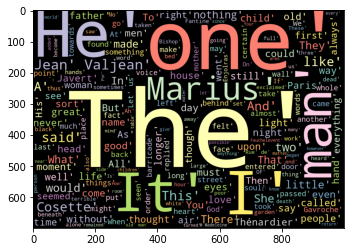

In [33]:
wordcloud = WordCloud(width = 1000, height = 700, 
                background_color ='black', colormap=plt.cm.Set3,
                min_font_size = 10).generate(str(book_w))
plt.imshow(wordcloud)

In [32]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Cravatte','Valjean','Gervais','Fantine','Tholomyès'
                  ,'Blachevelle','Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Thénardier',
                  'Éponine','Azelma','Javert','Fauchelevent','Bamatabois','Champmathieu',
                  'Brevet','Simplice','Chenildieu','Cochepaille','Innocente','Reverend','Ascension','Crucifixion',
                  'Gavroche','Magnon',
                  'Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre','Prouvaire',
                 'Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Brujon',
                 'Toussaint'] 

In [34]:
fdistc = FreqDist(book_w)
fdistc.most_common(10)

[(',', 48757),
 ('.', 26191),
 ('“', 7119),
 ('”', 7048),
 (';', 5885),
 ('The', 3909),
 ('’', 3707),
 ('I', 3706),
 ('!', 3539),
 ('?', 2976)]

In [55]:
freqc= [ x for x in book_w if x in character_list]
fdistc = FreqDist(freqc)
a= fdistc.most_common()
b=list(a)

[('Marius', 1327), ('Valjean', 1096), ('Cosette', 987), ('Thénardier', 520), ('Javert', 443), ('Gavroche', 300), ('Fauchelevent', 284), ('Bishop', 260), ('Enjolras', 247), ('Gillenormand', 230), ('Fantine', 200), ('Courfeyrac', 182), ('Combeferre', 88), ('Mabeuf', 87), ('Grantaire', 83), ('Éponine', 80), ('Magloire', 76), ('Tholomyès', 60), ('Brujon', 57), ('Toussaint', 52), ('Champmathieu', 46), ('Favourite', 42), ('Bahorel', 36), ('Joly', 36), ('Myriel', 28), ('Simplice', 28), ('Magnon', 28), ('Prouvaire', 28), ('Baptistine', 27), ('Blachevelle', 27), ('Feuilly', 26), ('Gervais', 25), ('Brevet', 23), ('Azelma', 21), ('Colonel', 20), ('Dahlia', 19), ('Zéphine', 16), ('Cochepaille', 14), ('Chenildieu', 14), ('Crucifixion', 13), ('Listolier', 11), ('Fameuil', 11), ('Reverend', 10), ('Patron-Minette', 5), ('Bamatabois', 4), ('Cravatte', 3), ('Ascension', 3), ('Lesgle', 3), ('Innocente', 2)]
